## <center> Real Time Stock Price Prediction</center> 

 Stock  Market  Prediction,  the  aim  is  to predict  the  future value  of  the  financial stocks  of  a company. The recent trend in stock market prediction technologies  is  the  use  of  machine  learning  which makes predictions based on the values of current stock market  indices  by  training  on  their previous  values.

In [2]:
#import the libraries




import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt 
import pandas_datareader.data as web 
from matplotlib import style
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from bokeh.plotting import figure, output_notebook, show 



In [3]:
df=web.DataReader('AAPL',data_source="yahoo",start="3-1-15",end="25-10-19")

In [4]:
df.reset_index()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-03-02,130.279999,128.300003,129.250000,129.089996,48096700.0,119.435738
1,2015-03-03,129.520004,128.089996,128.960007,129.360001,37816300.0,119.685532
2,2015-03-04,129.559998,128.320007,129.100006,128.539993,31666300.0,118.926880
3,2015-03-05,128.750000,125.760002,128.580002,126.410004,56517100.0,116.956177
4,2015-03-06,129.369995,126.260002,128.399994,126.599998,72842100.0,117.131958
5,2015-03-09,129.570007,125.059998,127.959999,127.139999,88528500.0,117.631577
6,2015-03-10,127.220001,123.800003,126.410004,124.510002,68856600.0,115.198265
7,2015-03-11,124.769997,122.110001,124.750000,122.239998,68939000.0,113.098038
8,2015-03-12,124.900002,121.629997,122.309998,124.449997,48362700.0,115.142754
9,2015-03-13,125.400002,122.580002,124.400002,123.589996,51827300.0,114.347054


In [5]:
df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1174 entries, 2015-03-02 to 2019-10-25
Data columns (total 6 columns):
High         1174 non-null float64
Low          1174 non-null float64
Open         1174 non-null float64
Close        1174 non-null float64
Volume       1174 non-null float64
Adj Close    1174 non-null float64
dtypes: float64(6)
memory usage: 64.2 KB


In [8]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1174.000000,1174.000000,1174.000000,1174.000000,1.174000e+03,1174.000000
mean,152.641576,150.001107,151.301261,151.357470,3.539092e+07,146.725512
std,39.508288,38.786930,39.113241,39.151302,1.728890e+07,40.911806
min,91.669998,89.470001,90.000000,90.339996,1.136200e+07,85.651482
25%,116.502501,114.105000,115.447500,115.287498,2.377555e+07,108.578516
50%,151.645004,148.775002,149.945000,150.260002,3.141045e+07,145.701988
75%,182.599998,178.527496,180.312504,180.677502,4.197428e+07,178.787445
max,246.729996,242.880005,244.509995,246.580002,1.622063e+08,246.580002


In [9]:
df.rename(columns={"Adj Close":"Adj_close"},inplace=True)

Text(0,0.5,'volume')

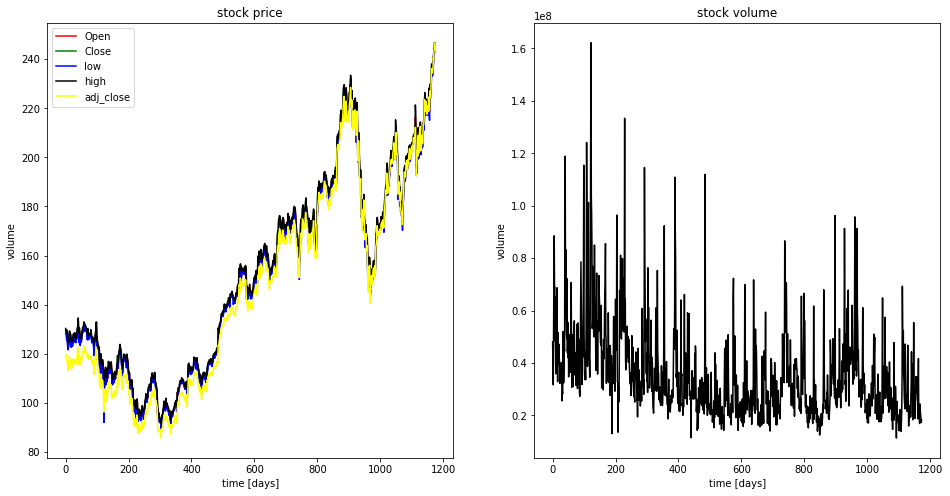

In [10]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1);
plt.plot(df.Open.values, color='red', label='Open')
plt.plot(df.Close.values, color='green', label='Close')
plt.plot(df.Low.values, color='blue', label='low')
plt.plot(df.High.values, color='black', label='high')
plt.plot(df.Adj_close.values,color='yellow',label="adj_close")
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best')
plt.subplot(1,2,2);
plt.plot(df.Volume.values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')

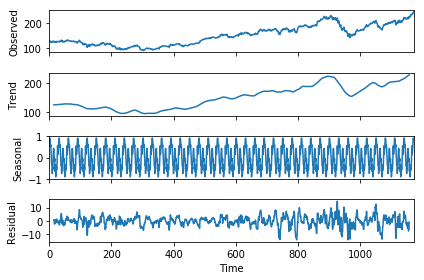

In [11]:


sm.tsa.seasonal_decompose(df.Close.values,freq=30).plot()
result = sm.tsa.stattools.adfuller(df.Close)
plt.show()
#decomposition = seasonal_decompose(df.Close.values, freq=30)

In [12]:
df.shape

(1174, 6)

In [13]:
train = df[:900]
test = df[900:]


In [14]:
train_ar = train['Close'].values
test_ar = test['Close'].values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)


<class 'list'>
Testing Mean Squared Error: 14.167


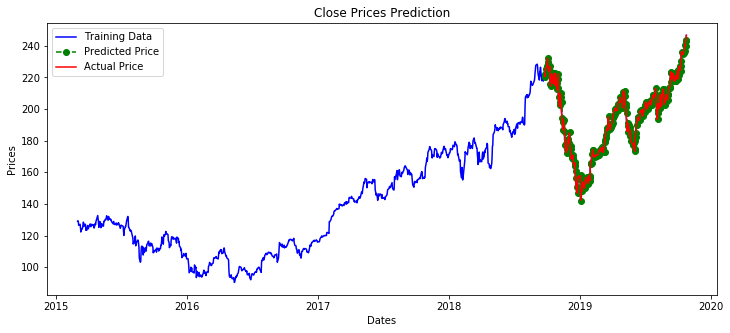

In [15]:
plt.figure(figsize=(12,5))
plt.plot(df['Close'], 'green', color='blue', label='Training Data')
plt.plot(test.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test.index, test['Close'], color='red', label='Actual Price')
plt.title('Close Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

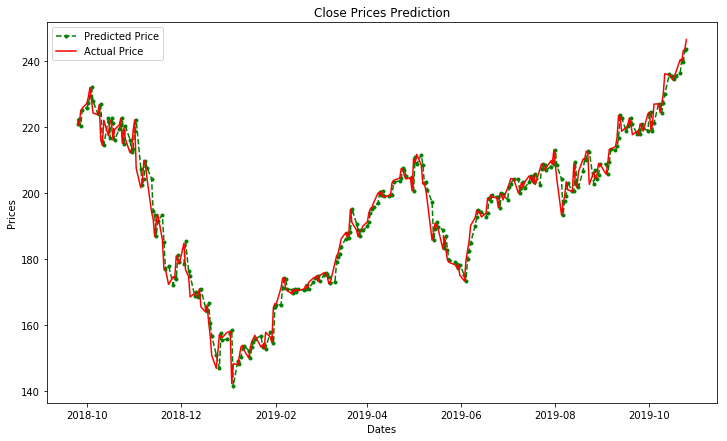

In [16]:
plt.figure(figsize=(12,7))
plt.plot(test.index, predictions, color='green', marker='.', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test.index, test['Close'], color='red', label='Actual Price')
plt.title('Close Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

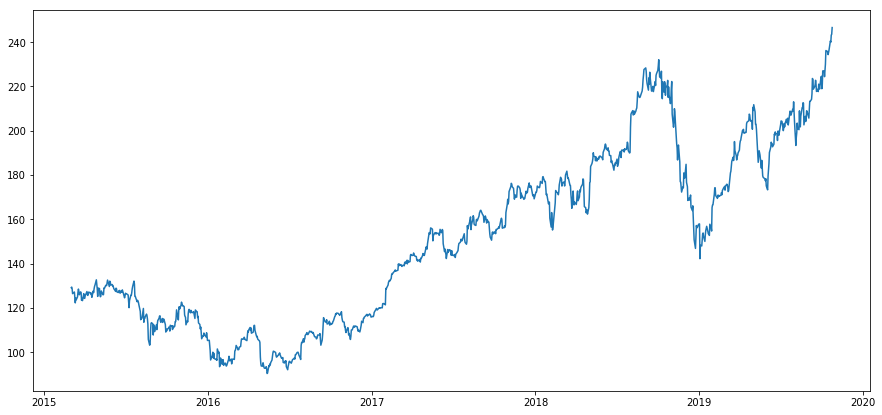

In [17]:
plt.figure(figsize=(15, 7))
plt.plot(df.index,df["Close"])

In [18]:
output_notebook() 
  
# create figure 
p = figure(plot_width = 400, plot_height = 400)

Loading BokehJS ...

In [19]:
p.line(df.index,df.Close, line_width = 2, color = "green")

GlyphRenderer(id='1039', ...)

In [20]:

show(p)

#### Conclusion:
    One technique  have  been  utilized  in  this  paper: ARIMA,  on the  Yahoo  finance dataset.  the technique have shown an improvement in the accuracy  of  predictions,  thereby  yielding  positive results.  Use  of  recently  introduced  machine  learning technique  in  the  prediction  of  stocks  have  yielded promising results and thereby marked the use of them in profitable  exchange  schemes.  It  has  led  to  the conclusion  that  it  is  possible  to  predict  stock  market with  more  accuracy  and  efficiency  using  machine learning technique.